In [2]:
import pandas as pd
import numpy as np

import os
from __future__ import print_function
import codecs
import pickle
import json

import numpy as np
import pandas as pd
import random

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn.manifold import MDS

from scipy.cluster.hierarchy import ward, dendrogram

import nltk
from nltk.stem.snowball import SnowballStemmer
import re
import mpld3

import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict

In [4]:
rating_headers = ['doc_id','hotel_name','hotel_url','street','city','state','country','zip','class','price','num_reviews','CLEANLINESS','ROOM','SERVICE','LOCATION','VALUE', 'COMFORT','overall_ratingsource']

In [19]:
df_hotels_las_vegas = pd.read_csv('data/las-vegas.csv', names = rating_headers).drop(0)

In [20]:
# san francisco
df_hotels_san_francisco = pd.read_csv('data/san-francisco.csv', names = rating_headers).drop(0)

In [7]:
# new york
df_hotels_new_york = pd.read_csv('data/new-york-city.csv', names = rating_headers).drop(0)

In [4]:
df_hotels_las_vegas.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
1,usa_nevada_las-vegas_staybridge_suites_las_vegas,staybridge suites las vegas,http://www.tripadvisor.com/ShowUserReviews-g45...,-1,las vegas,nv,usa,89118,-1,-1,113,4.884615384615385,4.913461538461538,4.721153846153846,4.259615384615385,4.855769230769231,0.0,4.726923076923077
2,usa_nevada_las-vegas_four_seasons_hotel_las_vegas,four seasons hotel las vegas,http://www.tripadvisor.com/ShowUserReviews-g45...,-1,las vegas,nv,usa,89119,-1,-1,427,4.823321554770318,4.614840989399293,4.692579505300353,4.219081272084805,4.339222614840989,0.0,4.5378091872791515
3,usa_nevada_las-vegas_desert_rose_resort,desert rose resort,http://www.tripadvisor.com/ShowUserReviews-g45...,-1,las vegas,nv,usa,89119,-1,-1,325,4.601328903654485,4.614617940199335,4.548172757475083,4.46843853820598,4.707641196013289,0.0,4.588039867109634
4,usa_nevada_las-vegas_signature_at_mgm_grand,signature at mgm grand,http://www.tripadvisor.com/ShowUserReviews-g45...,-1,las vegas,nv,usa,89109,-1,-1,324,4.7574750830564785,4.760797342192691,4.45514950166113,4.129568106312292,4.45514950166113,0.0,4.511627906976744
5,usa_nevada_las-vegas_skylofts_at_mgm_grand,skylofts at mgm grand,http://www.tripadvisor.com/ShowUserReviews-g45...,-1,las vegas,nv,usa,89109,-1,-1,77,4.863636363636363,4.893939393939394,4.803030303030303,4.53030303030303,4.378787878787879,0.0,4.693939393939393


In [21]:
df_hotels_san_francisco.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
1,usa_san francisco_fairmont_heritage_place_ghir...,fairmont heritage place ghirardelli square,http://www.tripadvisor.com/ShowUserReviews-g60...,900 north point street,san francisco,ca,USA,94109,-1,-1,41,4.897435897435898,4.948717948717949,4.769230769230769,4.743589743589744,4.615384615384615,0.0,4.794871794871795
2,usa_san francisco_hotel_drisco,hotel drisco,http://www.tripadvisor.com/ShowUserReviews-g60...,2901 pacific avenue,san francisco,ca,USA,94115,-1,-1,307,4.802816901408451,4.694835680751174,4.765258215962441,4.525821596244131,4.572769953051643,0.0,4.672300469483568
3,usa_san francisco_omni_san_francisco_hotel,omni san francisco hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,500 california street,san francisco,ca,USA,94104,-1,-1,350,4.767441860465116,4.571428571428571,4.737541528239203,4.485049833887043,4.431893687707642,0.0,4.598671096345514
4,usa_san francisco_the_inn_at_union_square,the inn at union square,http://www.tripadvisor.com/ShowUserReviews-g60...,440 post street,san francisco,ca,USA,94102,-1,-1,241,4.576086956521739,4.375,4.695652173913044,4.907608695652174,4.603260869565218,0.0,4.631521739130435
5,usa_san francisco_the_orchard_hotel,the orchard hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,665 bush street,san francisco,ca,USA,94108,-1,-1,333,4.687707641196013,4.584717607973422,4.465116279069767,4.691029900332226,4.514950166112957,0.0,4.588704318936878


In [9]:
# New york
df_hotels_new_york.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
1,usa_new york city_inn_new_york_city,inn new york city,http://www.tripadvisor.com/ShowUserReviews-g60...,266 west 71st st.,new york city,ny,USA,10023,-1,-1,98,4.984848484848484,4.9393939393939394,4.96969696969697,4.893939393939394,4.757575757575758,0.0,4.909090909090908
2,usa_new york city_casablanca_hotel,casablanca hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,147 west 43rd street,new york city,ny,USA,10036,-1,-1,330,4.73421926910299,4.21594684385382,4.767441860465116,4.840531561461794,4.382059800664452,0.0,4.588039867109634
3,usa_new york city_library_hotel,library hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,299 madison avenue,new york city,ny,USA,10017,-1,-1,341,4.897009966777409,4.4916943521594686,4.787375415282392,4.807308970099668,4.3754152823920265,0.0,4.671760797342193
4,usa_new york city_new_york_palace_hotel,new york palace hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,455 madison ave,new york city,ny,USA,10022,-1,-1,345,4.803986710963455,4.647840531561462,4.651162790697675,4.8604651162790695,4.3455149501661126,0.0,4.661794019933555
5,usa_new york city_the_french_quarters_guest_ap...,the french quarters guest apartments,http://www.tripadvisor.com/ShowUserReviews-g60...,346 w. 46th street,new york city,ny,USA,10036,-1,-1,33,4.896551724137931,4.724137931034483,4.689655172413793,4.793103448275862,4.655172413793103,0.0,4.751724137931035


In [5]:
df_hotels_las_vegas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 1 to 230
Data columns (total 18 columns):
doc_id                  230 non-null object
hotel_name              230 non-null object
hotel_url               230 non-null object
street                  230 non-null object
city                    230 non-null object
state                   230 non-null object
country                 230 non-null object
zip                     230 non-null object
class                   230 non-null object
price                   230 non-null object
num_reviews             230 non-null object
CLEANLINESS             230 non-null object
ROOM                    230 non-null object
SERVICE                 230 non-null object
LOCATION                230 non-null object
VALUE                   230 non-null object
COMFORT                 230 non-null object
overall_ratingsource    230 non-null object
dtypes: object(18)
memory usage: 34.1+ KB


In [18]:
df_hotels_san_francisco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 1 to 227
Data columns (total 18 columns):
doc_id                  227 non-null object
hotel_name              227 non-null object
hotel_url               227 non-null object
street                  227 non-null object
city                    227 non-null object
state                   227 non-null object
country                 227 non-null object
zip                     227 non-null object
class                   227 non-null object
price                   227 non-null object
num_reviews             227 non-null object
CLEANLINESS             227 non-null object
ROOM                    227 non-null object
SERVICE                 227 non-null object
LOCATION                227 non-null object
VALUE                   227 non-null object
COMFORT                 227 non-null object
overall_ratingsource    227 non-null object
dtypes: object(18)
memory usage: 33.7+ KB


In [29]:
df_hotels_new_york.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 260
Data columns (total 18 columns):
doc_id                  260 non-null object
hotel_name              260 non-null object
hotel_url               260 non-null object
street                  260 non-null object
city                    260 non-null object
state                   260 non-null object
country                 260 non-null object
zip                     260 non-null object
class                   260 non-null object
price                   260 non-null object
num_reviews             260 non-null int64
CLEANLINESS             260 non-null object
ROOM                    260 non-null object
SERVICE                 260 non-null object
LOCATION                260 non-null object
VALUE                   260 non-null object
COMFORT                 260 non-null object
overall_ratingsource    260 non-null float64
dtypes: float64(1), int64(1), object(16)
memory usage: 38.6+ KB


In [25]:
# convert overall_ratingsource to float
df_hotels_las_vegas['overall_ratingsource'] = df_hotels_las_vegas['overall_ratingsource'].astype(float)

In [22]:
# SF - convert overall_ratingsource to float
df_hotels_san_francisco['overall_ratingsource'] = df_hotels_san_francisco['overall_ratingsource'].astype(float)

In [10]:
# NY - convert overall_ratingsource to float
df_hotels_new_york['overall_ratingsource'] = df_hotels_new_york['overall_ratingsource'].astype(float)

In [27]:
# convert num_reviews to int
df_hotels_las_vegas['num_reviews'] = df_hotels_las_vegas['num_reviews'].astype(int)

In [23]:
# SF - convert num_reviews to int
df_hotels_san_francisco['num_reviews'] = df_hotels_san_francisco['num_reviews'].astype(int)

In [24]:
# Count reviews of SF
df_hotels_san_francisco['num_reviews'].sum()

30411

In [28]:
# Count reviews of Vegas
df_hotels_las_vegas['num_reviews'].sum()

26517

In [13]:
# NY - convert num_reviews to int
df_hotels_new_york['num_reviews'] = df_hotels_new_york['num_reviews'].astype(int)

In [14]:
# Count reviews of NY
df_hotels_new_york['num_reviews'].sum()

55147

In [7]:
# get rid of all hotels that are ratings below 4
lower_2 = df_hotels_las_vegas['overall_ratingsource'] > 2
df_hotels_las_vegas = df_hotels_las_vegas[lower_2]

In [21]:
# get rid of all hotels that are ratings below 4
lower_2 = df_hotels_san_francisco['overall_ratingsource'] > 2
df_hotels_san_francisco = df_hotels_san_francisco[lower_2]

In [8]:
df_hotels_las_vegas.count()

doc_id                  198
hotel_name              198
hotel_url               198
street                  198
city                    198
state                   198
country                 198
zip                     198
class                   198
price                   198
num_reviews             198
CLEANLINESS             198
ROOM                    198
SERVICE                 198
LOCATION                198
VALUE                   198
COMFORT                 198
overall_ratingsource    198
dtype: int64

In [22]:
df_hotels_san_francisco.count()

doc_id                  213
hotel_name              213
hotel_url               213
street                  213
city                    213
state                   213
country                 213
zip                     213
class                   213
price                   213
num_reviews             213
CLEANLINESS             213
ROOM                    213
SERVICE                 213
LOCATION                213
VALUE                   213
COMFORT                 213
overall_ratingsource    213
dtype: int64

In [15]:
df_hotels_las_vegas['num_reviews'].sum()

26273

In [23]:
df_hotels_san_francisco['num_reviews'].sum()

30104

''

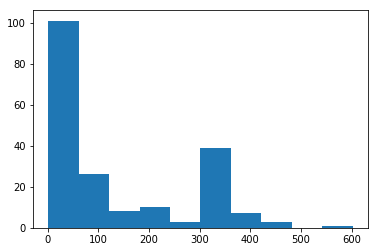

In [13]:
plt.hist(df_hotels_las_vegas['num_reviews'])
;

''

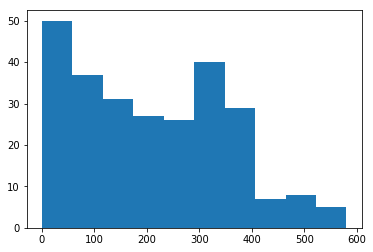

In [30]:
plt.hist(df_hotels_new_york['num_reviews'])
;

''

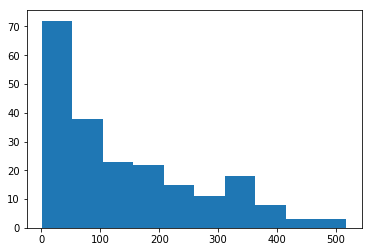

In [25]:
# SF
plt.hist(df_hotels_san_francisco['num_reviews'])
;

In [14]:
# average reviews
df_hotels_las_vegas['num_reviews'].mean()

132.6919191919192

In [27]:
# SF - average reviews
df_hotels_san_francisco['num_reviews'].mean()

141.33333333333334

''

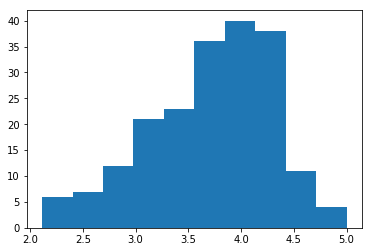

In [9]:
plt.hist(df_hotels_las_vegas['overall_ratingsource'])
;

''

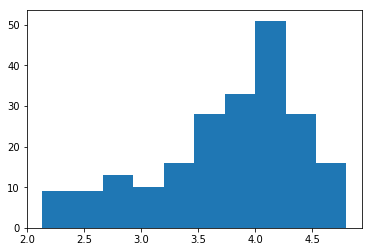

In [28]:
# SF
plt.hist(df_hotels_san_francisco['overall_ratingsource'])
;

''

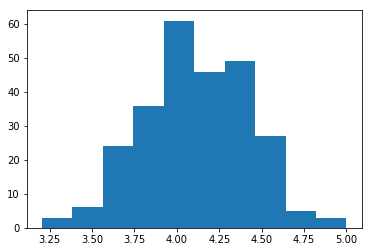

In [31]:
plt.hist(df_hotels_new_york['overall_ratingsource'])
;

In [32]:
# get all file_names ids
file_names = os.listdir('data/new-york-city/')

In [33]:
for name in file_names:
    if "." in name:
        print(name)

In [34]:
file_names

['usa_new york city_the_st_regis_hotel_new_york',
 'usa_new york city_the_muse_hotel_new_york_a_kimpton_hotel',
 'usa_new york city_holiday_inn_nyc_manhattan_6th_avenue',
 'usa_new york city_new_york_palace_hotel',
 'usa_new york city_the_bowery_hotel',
 'usa_new york city_the_sherry_netherland_hotel',
 'usa_new york city_70_park_avenue_hotel_a_kimpton_hotel',
 'usa_new york city_park_79_hotel',
 'usa_new york city_the_pierre',
 'usa_new york city_hotel_mela',
 'usa_new york city_club_quarters_downtown',
 'usa_new york city_best_western_bowery_hanbee_hotel',
 'usa_new york city_phillips_club',
 'usa_new york city_the_hampton_inn_times_square_north',
 'usa_new york city_amsterdam_court_hotel',
 'usa_new york city_the_benjamin',
 'usa_new york city_the_time',
 'usa_new york city_thirty_thirty_hotel',
 'usa_new york city_hotel_metro',
 'usa_new york city_hotel_elysee',
 'usa_new york city_sofitel_new_york',
 'usa_new york city_doubletree_metropolitan_hotel',
 'usa_new york city_murray_hil

In [38]:
def get_hotel_reviews(file_name):
    
    review_headers = ['date', 'review_title', 'full_review', 'nan']
    
    reviews = []
    
    df = pd.read_csv('data/new-york-city/' + file_name, 
                     names=review_headers ,sep='\t', encoding='latin-1').drop('nan', axis=1)
    
    for review in df['full_review']:
        reviews.append(str(review))
        
    corpus = " ".join(reviews)
    
    return file_name, corpus

In [49]:
# # test one filename
# h, r = get_hotel_reviews('usa_new york city_park_central')

In [15]:
# type(r)

In [36]:
# start_name_index = len('usa_nevada_las-vegas_')

In [43]:
hotel_names = []
hotel_reviews = []

for idx, name in enumerate(file_names):
    # for some reason file #45 isn't working in NYC
#     print(idx, name)
    if idx == 45:
        continue
    hotel, all_reviews = get_hotel_reviews(name)
    hotel_names.append(hotel)
    hotel_reviews.append(all_reviews)

In [44]:
len(hotel_names), len(hotel_reviews)

(257, 257)

In [45]:
print ('There are {} hotels in the dataset.'.format(len(hotel_names)))

There are 257 hotels in the dataset.


In [50]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [51]:
# load nltk's SnowballStemmer as variabled 'stemmer'
stemmer = SnowballStemmer("english")

In [52]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [53]:
# If you are running this process for the first time, uncomment below:
hotel_vocab_stemmed = []
hotel_vocab_tokenized = []

for i in hotel_reviews:
    allwords_stemmed = tokenize_and_stem(i)
    hotel_vocab_stemmed.extend(allwords_stemmed)
    allwords_tokenized = tokenize_only(i)
    hotel_vocab_tokenized.extend(allwords_tokenized)

In [24]:
len(hotel_vocab_stemmed), len(hotel_vocab_tokenized)

(5328015, 5328015)

In [25]:
%time hotel_vocab_frame = pd.DataFrame({'words': hotel_vocab_tokenized}, index = hotel_vocab_stemmed)

CPU times: user 989 ms, sys: 1.48 s, total: 2.47 s
Wall time: 2.88 s


In [26]:
hotel_vocab_frame.head()

,words
we,we
stop,stopped
by,by
the,the
resort,resort


### Tf-Idf and Document Similarity Measure

In [27]:
combined = list(zip(hotel_names, hotel_reviews))

In [28]:
# randomly shuffle the hotels, keeping the names in order with the reviews
random.shuffle(combined)
# retrieve hotel names and hotel reviews in the new order, after shuffling
hotel_names[:], hotel_reviews[:] = zip(*combined)

In [40]:
# for testing purposes, you can use this snippet to run kmeans on 100 hotels of the whole corpus.
reviews_grouped = [hotel_reviews[i:i + 100] for i in range(0, len(hotel_reviews), 100)]
print ("There are {} hotels in our sample.".format(len(reviews_grouped[0])))

# # 200 -for testing purposes, you can use this snippet to run kmeans on 100 hotels of the whole corpus.
# reviews_grouped = [hotel_reviews[i:i + 200] for i in range(0, len(hotel_reviews), 200)]
# print ("There are {} hotels in our sample.".format(len(reviews_grouped[0])))

There are 200 hotels in our sample.


In [41]:
# initiate TfidfVectorizer instance with the set hyperparameters that were mentioned above
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1, 3))
%time tfidf_matrix = tfidf_vectorizer.fit_transform(reviews_grouped[0])
print(tfidf_matrix.shape)

CPU times: user 3min 26s, sys: 5.11 s, total: 3min 31s
Wall time: 3min 40s
(200, 5735)


In [31]:
# saving the matrix by dumping into a pickle file. set *protocol=2* if you are using python2
joblib.dump(tfidf_matrix,  'data/tfidf_matrix2.pkl')
#tfidf_matrix = joblib.load('tfidf_matrix2.pkl')

['data/tfidf_matrix2.pkl']

In [42]:
terms = tfidf_vectorizer.get_feature_names()
# calculate cosine similarity
dist = 1 - cosine_similarity(tfidf_matrix)

# K-means clustering

In [33]:
num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

CPU times: user 8.5 s, sys: 77 ms, total: 8.57 s
Wall time: 8.79 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
#joblib.dump(km,  'doc_cluster.pkl')
clusters = km.labels_.tolist()
len(clusters)
# 100 hotels

100

In [35]:
ranks = []

for i in range(0,len(hotel_names)):
    ranks.append(i)

In [36]:
# every group has 1000 ramdonly shuffled hotels, change indeces
hotels = { 'hotel_name': hotel_names[:100], 'rank': ranks[:100], 'hotel_reviews': hotel_reviews[:100], 'cluster': clusters}

frame = pd.DataFrame(hotels, index = [clusters] , columns = ['rank', 'hotel_name', 'hotel_reviews', 'cluster'])

In [37]:
frame['cluster'].value_counts()

4    37
2    24
3    19
1    13
0     7
Name: cluster, dtype: int64

In [38]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    70.428571
1    48.923077
2    50.250000
3    49.842105
4    45.081081
Name: rank, dtype: float64

In [39]:
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % hotel_vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
    print("Cluster %d hotels:" % i, end='')
    for title in frame.loc[i]['hotel_name'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: b'suite', b'budget', b'roach', b'office', b'dont', b'information', b'security', b'pets', b'extended', b'police', b'since', b'smelled', b'deposit', b'drug', b'months', b'cigarette', b'stains', b'extended', b'cheap', b'phone',

Cluster 0 hotels: the_suites_boulder_strip, super_8_las_vegas_boulder_highway, town_and_country_manor_iii, aruba_hotel, the_suites, budget_suites_of_america_north_rancho_drive, budget_suites_of_america_wynn,

Cluster 1 words: b'fremont', b'downtown', b'fremont', b'nugget', b'golden', b'tower', b'freemont', b'year', b'westerns', b'play', b'elevator', b'slot', b'golden', b'gamble', b'stay', b'queen', b'table', b'lovely', b'cheap', b'machines',

Cluster 1 hotels: las_vegas_club_casino_hotel, fitzgeralds_casino_hotel, el_cortez_hotel_casino, fremont_hotel_and_casino, ogden_house_motel, western_hotel_casino, golden_gate_hotel_casino, four_queens_hotel_and_casino, golden_nugget, best_western_main_street_inn, jerry_s_nugget, binio

In [43]:
# problem, vegas hotels might not be enough by itself